In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image       # PythonImagingLibrary

In [39]:
image_path1 = r'D:\drive-download-20240511T193904Z-001\1.png'
image_path2 = r'D:\drive-download-20240511T193904Z-001\2.png'
image_path3 = r'D:\drive-download-20240511T193904Z-001\3.png'
image_path4 = r'D:\drive-download-20240511T193904Z-001\4.png'

# img = []
img1 = Image.open(image_path1)
img2 = Image.open(image_path2)
img3 = Image.open(image_path3)
img4 = Image.open(image_path4)

# Convert to greyscale
image_gray1 = img1.convert("L")         
image_gray2 = img2.convert("L")
image_gray3 = img3.convert("L")
image_gray4 = img4.convert("L")

In [40]:
def model(img):
    
    # To convert the pixels of the images into a 2D array
    image_gray = img.convert("L")
    
    image_array = np.array(image_gray)
    
    return image_array

In [63]:
pxls = model(img1)
pxls.shape

(64, 64)

In [61]:
X = []
for i in range(64):
    for j in range(64):
        X.append([i, j])
        
X

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [0, 24],
 [0, 25],
 [0, 26],
 [0, 27],
 [0, 28],
 [0, 29],
 [0, 30],
 [0, 31],
 [0, 32],
 [0, 33],
 [0, 34],
 [0, 35],
 [0, 36],
 [0, 37],
 [0, 38],
 [0, 39],
 [0, 40],
 [0, 41],
 [0, 42],
 [0, 43],
 [0, 44],
 [0, 45],
 [0, 46],
 [0, 47],
 [0, 48],
 [0, 49],
 [0, 50],
 [0, 51],
 [0, 52],
 [0, 53],
 [0, 54],
 [0, 55],
 [0, 56],
 [0, 57],
 [0, 58],
 [0, 59],
 [0, 60],
 [0, 61],
 [0, 62],
 [0, 63],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [1, 19],
 [1, 20],
 [1, 21],
 [1, 22],
 [1, 23],
 [1, 24],
 [1, 25],
 [1, 26],
 [1, 27],
 [1, 28],
 [1, 29],
 [1, 30],
 [1, 31],
 [1, 32],
 [1, 33],
 [1, 34],
 [1, 35],
 [1, 36],
 [1, 37],


In [80]:
y = []
for i in range(64):
    for j in range(64):
        if pxls[i][j] == 0:
            y.append(pxls[i][j])
        else:
            y.append(1)
cnt = 0
for i in y:
    if i == 1:
        cnt += 1
cnt

## Now, our X and y are ready....

129

Great, now, we have created an array of greyscale off the image given

In [42]:
def initialize_centroids(data, k):
    ## randomly initialize the centers
    np.random.seed(1234)
    centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    # The above line of code would generate the 
    centroids = data[centroids_indices]
    return centroids    

In [43]:
def assign_clusters(data, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)
## np.argmin function returns the index of the smallest element of an array. So, 

In [44]:
def update_centroids(data, clusters, k):
    """
    Update centroids as the mean of the data points assigned to each centroid.
    """
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = cluster_points.mean(axis=0)
    return centroids

In [45]:
def kmeans(data, k, max_iters=100, tol=1e-4):
    """
    Perform K-means clustering on the data.
    """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        if np.linalg.norm(centroids - prev_centroids) < tol:
            break
    return centroids, clusters

In [46]:
def elbow_method(data, max_clusters):
    """
    Determine the optimal number of clusters using the Elbow Method.
    """
    wcssArr = []
    for k in range(1, max_clusters + 1):
        centroids, clusters = kmeans(data, k)
        wcss = 0
        for i in range(k):
            cluster_points = data[clusters == i]
            if len(cluster_points) > 0:
                centroid = centroids[i]
                wcss += np.sum((cluster_points - centroid) ** 2)
        wcssArr.append(wcss)
    
    # Plot the Elbow curve
    plt.plot(range(1, max_clusters + 1), wcssArr, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()

    # Find the elbow point
    elbow_point = 0
    l = len(wcssArr)
    for i in range(1, l - 1):
        slope1 = (wcssArr[i] - wcssArr[i - 1]) / (i - (i - 1))
        slope2 = (wcssArr[i + 1] - wcssArr[i]) / ((i + 1) - i)
        if abs(slope2) < abs(slope1):
            elbow_point = i + 1
            break
    
    return elbow_point

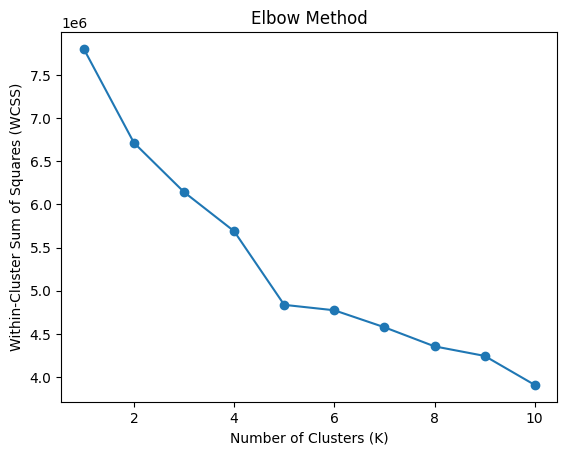

2

In [47]:
k = elbow_method(pxls, 10)
k

In [48]:
centroids = initialize_centroids(pxls, k)
print(centroids)
centroids.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 255 255   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 255   0 255   0
  255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]


(2, 64)

In [49]:
clusters = assign_clusters(pxls, centroids)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [50]:
centroids = update_centroids(pxls, clusters, k)
print(centroids)
centroids.shape

[[  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     4.25   4.25   4.25   8.5   17.    12.75  12.75   8.5    8.5
    8.5   12.75   0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     4.25   0.     0.    12.75   8.5   17.    17.
   12.75  17.    21.25  12.75  17.     8.5    8.5    4.25   0.     0.
    4.25   0.     0.     0.    12.75  17.     8.5   12.75  25.5   21.25
   25.5   17.    12.75  12.75]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   63.75   0.     0.   127.5  127.5  191.25 191.25 191.25 255.   191.25
   63.75   0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.    63.75   0.
    0.   191.25   0.    63.75   0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.  ]]


(2, 64)

In [51]:
fincent, finclust = kmeans(pxls, k, max_iters=100, tol=1e-4)
print(fincent)
print(finclust)

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           4.3220339    4.3220339    4.3220339    8.6440678
   17.28813559   8.6440678    8.6440678    4.3220339    8.6440678
    4.3220339   12.96610169   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           4.3220339    0.
    0.          12.96610169   8.6440678   17.28813559  17.28813559
   12.96610169  17.28813559  21.61016949  12.96610169  12.96610169
    8.6440678    8.6440678    4.3220339    0.           0.
    4.3220339    0.           0.           0.          12.96610169
   17.28813559   8.6440678   12.96610169  25.93220339  21.61016949
   25.93220339  17.28813559  12.96610169  12.96610169]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
   51.           0.           0.         102.         102.
  153.        

In [52]:
def calculate_city_centers(centroids, clusters):
    """
    Calculate the center points of the cities using the centroids of the clusters.
    """
    city_centers = []
    for i in range(len(centroids)):
        cluster_points = centroids[i]
        city_centers.append(cluster_points.mean(axis=0))
    return np.array(city_centers)

In [53]:
city_centers = calculate_city_centers(fincent, finclust)
city_centers

array([ 6.55058263, 25.5       ])

In [54]:
def calculate_distances(city_centers):
    """
    Calculate the distances between the cities using the center points.
    """
    num_cities = len(city_centers)
    distances = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            distance = np.linalg.norm(city_centers[i] - city_centers[j])
            distances[i, j] = distance
            distances[j, i] = distance
    return distances

In [55]:
distance = calculate_distances(city_centers)
distance

array([[ 0.        , 18.94941737],
       [18.94941737,  0.        ]])

In [56]:
def plot_distances(distances):
    """
    Visualize the distances between cities using a heatmap plot.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(distances, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Distance')
    plt.title('Distances Between Cities')
    plt.xlabel('City Index')
    plt.ylabel('City Index')
    plt.xticks(range(distances.shape[0]))
    plt.yticks(range(distances.shape[0]))
    plt.grid(visible=False)
    plt.show()

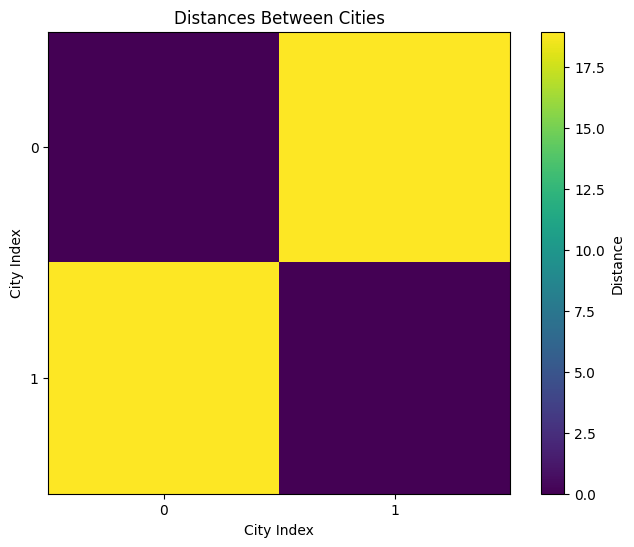

In [57]:
plot_distances(distance)